# Introduction
This notebook that I am creating will be using the titanic data set and what I will be trying to solve is the question who had a higher survival rate and if you were on the tiatnic what could you do to increase your survial chances? To start the journey to finding the soultion to my question's I first need to go and actaully collect the data. After that I need to creat a code box that will read in the data and also have all my imports that will be needed. I also want to thank AnalyticSteps for helping me with some code. I was going to use Linear Regression but realized with the data I have that it was not possible and I needed to use Logistic Regression. https://www.analyticssteps.com/blogs/how-does-linear-and-logistic-regression-work-machine-learning

OTHER SOURCES THAT HELPED:

https://scikit-learn.org/stable/modules/cross_validation.html

https://www.kaggle.com/brendan45774/titanic-top-solution#Relatives

In [524]:
# IMPORTS
import csv
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Load/Setup Dataset
Now that the data is downloaded and then uploaded to my python notebook, it's time to check out the data we got and see what can be used.

In [525]:
# data = pd.read_csv("titanic.csv")
data = sns.load_dataset("titanic")

col_names = list(data.columns)

In [526]:
print("All Coloumns in data:\n",col_names)
print()
print(data.head())
print(data.tail())

All Coloumns in data:
 ['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town', 'alive', 'alone']

   survived  pclass     sex   age  ...  deck  embark_town  alive  alone
0         0       3    male  22.0  ...   NaN  Southampton     no  False
1         1       1  female  38.0  ...     C    Cherbourg    yes  False
2         1       3  female  26.0  ...   NaN  Southampton    yes   True
3         1       1  female  35.0  ...     C  Southampton    yes  False
4         0       3    male  35.0  ...   NaN  Southampton     no   True

[5 rows x 15 columns]
     survived  pclass     sex   age  ...  deck  embark_town  alive  alone
886         0       2    male  27.0  ...   NaN  Southampton     no   True
887         1       1  female  19.0  ...     B  Southampton    yes   True
888         0       3  female   NaN  ...   NaN  Southampton     no  False
889         1       1    male  26.0  ...     C    Cherbourg    yes   True
890  

Now I have the data loaded in but as of right now it isn't really doing much for anyone. So it's time to start making this data work and show me something usefull but before we do that I wanna create a few plots to visuliaze the data and see what we are working with here.

In [527]:
data.iloc[0]

survived                 0
pclass                   3
sex                   male
age                     22
sibsp                    1
parch                    0
fare                  7.25
embarked                 S
class                Third
who                    man
adult_male            True
deck                   NaN
embark_town    Southampton
alive                   no
alone                False
Name: 0, dtype: object

Before I continue and start setting up my Machine Learning Models, I first want to see where missing data is located. If a certain column is missing to much data visually then I will drop it and not use it for the rest of my program. I was able to find a quick way of doing this on stack overflow by using a heatmap.

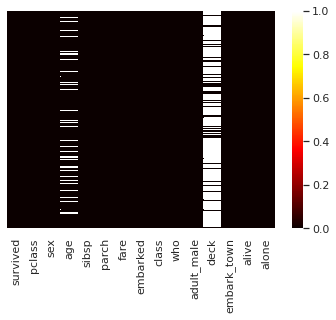

In [528]:
sns.heatmap(data.isnull(),yticklabels=False,cmap='hot')

What we can see from the image above produced from my code is that we have data for most everything but deck stands out, as most of the data for it is missing making that column useless to me.

In [529]:
data.drop(['deck'],inplace=True,axis=1)
data

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,Cherbourg,yes,True


While the age column is looking better than the deck column that was just dropped, it is still missing a lot of data. Age is gonna play a big factor for solving the question I have. So instead of dropping it i am gonna attempt to fill in the null spaces. The way I plan on doing this is by taking the average age of each 'Pclass'. Why did I decide to go with 'Pclass'? The reason being there are only 3 types of Pclasses making it easier to find the mean.

In [530]:
def find_age_mean(data):
  class1 = 0
  count1 = 0

  class2 = 0
  count2 = 0

  class3 = 0
  count3 = 0
  
  for i, row in data.iterrows():
    if row['age'] > 0 and row['class'] == 'First':
      class1 += row['age']
      count1 += 1
    if row['age'] > 0 and row['class'] == 'Second': 
      class2 += row['age']
      count2 += 1
    if row['age'] > 0 and row['class'] == 'Third': 
      class3 += row['age']
      count3 += 1
  print('Average age of class 1 is: ', np.round(class1/count1))
  print('Average age of class 2 is: ', np.round(class2/count2))
  print('Average age of class 3 is: ', np.round(class3/count3))

In [531]:
find_age_mean(data) # finds mean of Age using Pclass

Average age of class 1 is:  38.0
Average age of class 2 is:  30.0
Average age of class 3 is:  25.0


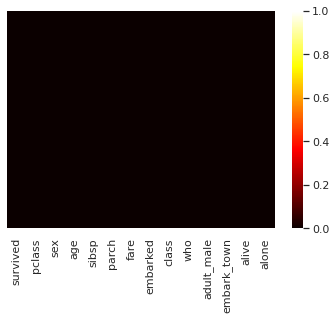

In [532]:
data.at[(data['age'].isnull()) & (data['class']=='First'),'age'] = 38
data.at[(data['age'].isnull()) & (data['class']=='Second'),'age'] = 30
data.at[(data['age'].isnull()) & (data['class']=='Third'),'age'] = 25
sns.heatmap(data.isnull(),yticklabels=False,cmap='hot')

Now that the data is all set, I want to plot some of it and compare each coloumn and see how many people survived. 

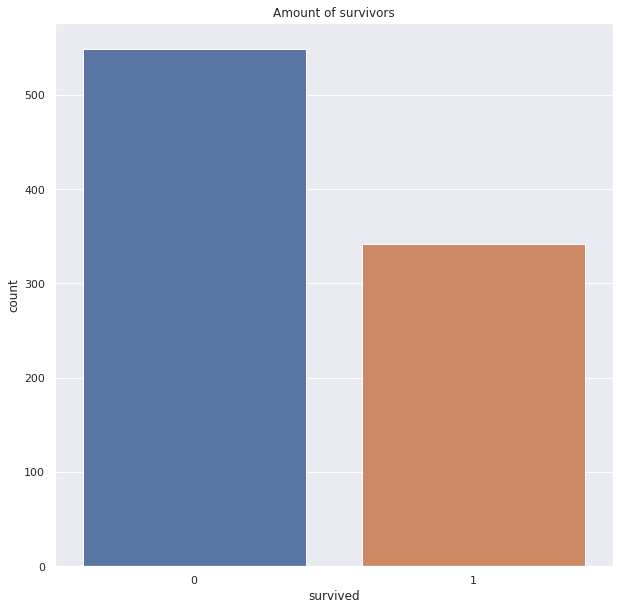

In [533]:
plt.figure(figsize=(10,10))
sns.set_theme(style="darkgrid")

plt.title('Amount of survivors')

sns.countplot(x='survived', data=data)

We can see that from our data, around 550 people died while roughly 350 people survived. Lets go further and see how many were men and how many were female.

Text(0.5, 1.0, 'Survival of the Gender')

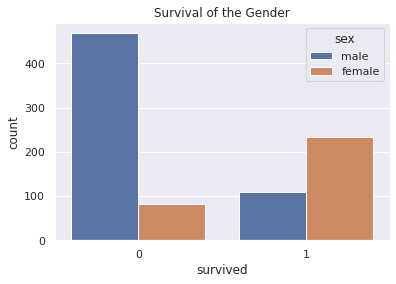

In [534]:
sns.countplot(x='survived',hue='sex',data=data)
plt.title('Survival of the Gender')

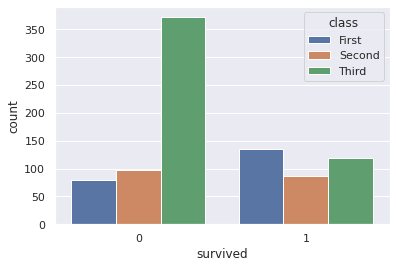

In [535]:
sns.countplot(x='survived',hue='class',data=data)

Text(0, 0.5, 'Count')

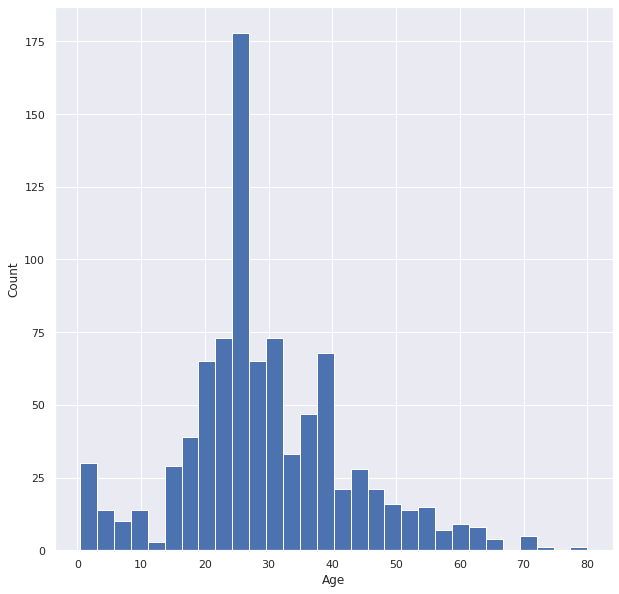

In [536]:
plt.figure(figsize=(10,10))
plt.hist(data['age'], bins=30)
plt.xlabel('Age')
plt.ylabel('Count')

The plot below shows the amount of sibilings or spouses a passenger had.

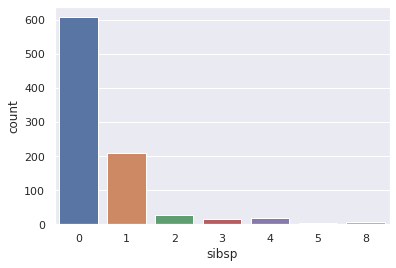

In [537]:
sns.countplot(x='sibsp',data=data)

Im going to turn some of the text columns into numerical values to be used in machine learing.

In [538]:
sex = pd.get_dummies(data['sex'],drop_first=True)
sex.head()

,male
0,1
1,0
2,0
3,0
4,1


In [539]:
embark = pd.get_dummies(data['embarked'],drop_first=True)
embark.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [540]:
data = pd.concat([data,sex,embark],axis=1)
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone,male,Q,S
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False,1,0,1
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False,0,0,0
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True,0,0,1
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False,0,0,1
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True,1,0,1


In [541]:
data.drop(['sex','embarked','class','who', 'adult_male', 'embark_town','alive','alone'],axis=1,inplace=True)
data.insert(0, 'PassengerId', range(0, 0 + len(data)))
data.head()

,PassengerId,survived,pclass,age,sibsp,parch,fare,male,Q,S
0,0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,1,38.0,1,0,71.2833,0,0,0
2,2,1,3,26.0,0,0,7.9250,0,0,1
3,3,1,1,35.0,1,0,53.1000,0,0,1
4,4,0,3,35.0,0,0,8.0500,1,0,1


New features have been extracted from existing features. Mutiple noisy variables such as Name, Ticket, and Cabin have been removed.  Variables with missing values have been handled by finding the mean and applying it to the null elements or dopping the column if to much data was missing. Useless features have been removed.

# Execute Models and Summarize Performance
I was planning on using Random Forest Classifier and Linear Regression as my two Machine learning methods to help me solve my question but I realized that Linear Regression was not going to work so I needed to use logistic regression instead. Luckly it is pretty similar to linear so it would not make it more difficult for me.

In [542]:
X= data.drop('survived',axis=1)
y = data['survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

model = LogisticRegression(max_iter=715)
model.fit(X_train,y_train)

y_pred = model.predict(X_test)

print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.85      0.87      0.86       174
           1       0.74      0.71      0.73        94

    accuracy                           0.81       268
   macro avg       0.80      0.79      0.79       268
weighted avg       0.81      0.81      0.81       268



Survival of Titanic passengers have been predicted by using 15 dependent variables and Logistic Regression Model. Accuracy, Precision, Recall and F1 scores demonstrating the explanatory and performance of the model have been calculated. Feature Importance has been calculated for selection of features that contributes the most in predicting the target variable.
Now I will run the random forest classifier and create dummy variables .I will talk about the results after!

In [543]:
y = data["survived"]

features = ["pclass", "male", "sibsp", "parch", "age"]
X = pd.get_dummies(data[features])
X_test = pd.get_dummies(data[features])

model = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=10)
model.fit(X, y)
predictions = model.predict(X_test)

print(classification_report(y,predictions))

# output = pd.DataFrame({'PassengerId': data.PassengerId, 'Survived': predictions})
# # The prediction made was outputed to a CVS file to read it easier
# output.to_csv('submission.csv', index=False)

              precision    recall  f1-score   support

           0       0.83      0.91      0.87       549
           1       0.83      0.69      0.76       342

    accuracy                           0.83       891
   macro avg       0.83      0.80      0.81       891
weighted avg       0.83      0.83      0.82       891



Now that my Random Forest is finish we can see what score we got and compare it to the logistic regression. When I print out the Classification report for logistic regression and random forest we can see that the results are pretty similar. But a clear winner has to be the random forest classifier because the accuracy score was higher by 0.02. While not a big diffrence it is still better!

# Conclusion
who had a higher survival rate and if you were on the tiatnic what could you do to increase your survial chances? That was the question I was trying to solve here. From our data and machine learning I have come to a conclusion that younger women who are from a higher wealthier class who were accompanied by 3 or more people, that was your best chance of survival. What can you do to increase you chances, will if your a woman then just find a group to accept you if you are alone. If you are a man, well I would recommend findind a dress and some make up and try to sneak your way into a life boat without saying a single word. Beside that, good luck.